# Bike Sharing Assignment: BoomBikes

### Business Understanding:

1. BoomBikes,a bike-sharing system where bikes are made available for shared use to individuals on a short term basis for a price or free. 
2. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. 
3. This bike can then be returned to another dock belonging to the same system.

### Business Objective/Goals:

BoomBikes wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Checkpoint 1: Data Understanding and Data Cleaning

<b>Steps Involved:</b><br>

1. Understand the dataset, datatype of the dataset
2. Perform EDA - Check for null values, fix the values in columns to make more sense, rename columns to make more sense
3. Check co-relation between variables to identify if there are any variables that can be dropped

Let's begin by importing the csv file into a pandas dataframe

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import CSV
bike_df = pd.read_csv('day.csv')

Let's understand what the encoding of the csv file is and if the data from csv has been imported properly without any junk characters which would hinder our analysis.

In [3]:
#Let's check the eencoding of the csv files
import chardet

with open("day.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
    
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [4]:
#let's check the head and tail to make sure there are no extra/unnecessary rows and columns and also have a basic feel of dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


There are no special/junk characters. Hence the csv has been read with correct encoding. Let's look at the size of the dataframe and the datatypes of each column present in the dataframe.

In [6]:
#The shape of the dataframe
bike_df.shape

(730, 16)

In [7]:
#Check the datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the above table, we can implicitly infer that there are no nulls. Hence there is no need of fixing null values by dropping or imputing mean/mode.

Next step would be to go through the data dictionary to understand what each of the above columns signify. Upon going through the data dictionary provided, there are some redundant columns which can be dropped as they are being represented by other meaningful columns in the dataset. Let's list them down and drop them from the dataframe

In [8]:
#list of columns which are not relevant for analysis
unwanted_col = ['instant','dteday','temp','casual','registered']

#Drop the columns listed above as unwanted
bike_df = bike_df.drop(unwanted_col,axis=1)

Now let's check the number/count of unique values in each of the columns present in DF

In [9]:
#let's look at the count of unique values in each column
for column in bike_df.columns:
    print(bike_df[column].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64
61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64
7.416900     3
15.333486    3
7.959064     3
11.166689    3
7.125450     3
            ..
14.500475    1
8.250514     1
19.416332    1
16.522200  

From the above value_counts command and the data dictionary which we already went through, it makes more sense to have the actual categorical values than the numerical values representing these columns. The mapping is as follows:
1. season:
    * 1 - Spring
    * 2 - Summer
    * 3 - Fall
    * 4 - Winter
2. mnth:
    * 1 - Jan
    * 2 - Feb
    * 3 - Mar
    * 4 - Apr
    * 5 - May
    * 6 - Jun
    * 7 - Jul
    * 8 - Aug
    * 9 - Sep
    * 10 - Oct
    * 11 - Nov
    * 12 - Dec
3. weekday:
    * 0 - Tuesday
    * 1 - Wednesday
    * 2 - Thursday
    * 3 - Friday
    * 4 - Saturday
    * 5 - Sunday
    * 6 - Monday
4. weathersit:
    * 1 - clear
    * 2 - misty
    * 3 - rainy
    * 4 - thunderstorm - But there are no entries in the provided dataset with this value. Hence this can be ignored

The following binary columns will not be converted to categorical variables even though their meaning can be derived better when represented as categorical variable. Following is the meaning of binary values in these columns

1. yr:
    * 0 - 2018
    * 1 - 2019
2. holiday:
    * 0 - No
    * 1 - Yes
3. workingday:
    * 0 - No
    * 1 - Yes

In [10]:
#replace the numeric values with categorical values for season as defined above in markdown cell
bike_df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

#replace the numeric values with categorical values for month as defined above in markdown cell
bike_df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

#replace the numeric values with categorical values for weekday as defined above in markdown cell
bike_df['weekday'].replace({0:'tue',1:'wed',2:'thur',3:'fri',4:'sat',5:'sun',6:'mon'},inplace=True)

#replace the numeric values with categorical values for weather situation(weathersit) as defined above in markdown cell
bike_df['weathersit'].replace({1:'clear',2:'misty',3:'rainy'},inplace=True)

As part of fixing the values, let's also standardise the continuous numeric variables by correcting the precision to 2 decimal points in all the columns with float data type

In [11]:
#fix precision of the numeric values to 2 digits to maintain uniformity
bike_df[['atemp','hum','windspeed']] = round(bike_df[['atemp','hum','windspeed']],2)

Let's also rename the column cnt to demand to make more sense as <b>cnt</b> defines the <b>demand</b> of bike service which is our <b>Target Variable</b>

In [12]:
bike_df.rename(columns={'cnt':'demand'},inplace = True)

Let's again take a look at the the dataframe post fixing all the values accordingly

In [13]:
#check the first few records
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,demand
0,spring,0,Jan,0,mon,0,misty,18.18,80.58,10.75,985
1,spring,0,Jan,0,tue,0,misty,17.69,69.61,16.65,801
2,spring,0,Jan,0,wed,1,clear,9.47,43.73,16.64,1349
3,spring,0,Jan,0,thur,1,clear,10.61,59.04,10.74,1562
4,spring,0,Jan,0,fri,1,clear,11.46,43.70,12.52,1600


In [14]:
#check datatypes of the column if they have changed according to data fix performed
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  demand      730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


Let's perform <b>EDA</b> to understand the data better. Let's start by listing down the categorical variables and continuous numeric variables in 2 different lists to visualize data accordingly.

In [15]:
#list all the columns that belong to 'object' datatype
cat_var = [column for column in bike_df.columns if bike_df[column].dtype.name == 'object']

#add columns that are essentially categorical variables but because they are binary in nature have int datatype
cat_var = cat_var+['holiday','workingday','yr']

#list down the continuous numeric variables in a list
num_var = ['atemp','hum','windspeed','demand']

#Print out the lists created
print(cat_var)
print(num_var)

['season', 'mnth', 'weekday', 'weathersit', 'holiday', 'workingday', 'yr']
['atemp', 'hum', 'windspeed', 'demand']


In [16]:
#Check the stats of the values present in numeric columns
bike_df[num_var].describe()

,atemp,hum,windspeed,demand
count,730.000000,730.000000,730.000000,730.000000
mean,23.726384,62.765082,12.763699,4508.006849
std,8.150247,14.237634,5.195640,1936.011647
min,3.950000,0.000000,1.500000,22.000000
25%,16.892500,52.000000,9.040000,3169.750000
50%,24.370000,62.625000,12.130000,4548.500000
75%,30.445000,72.990000,15.627500,5966.000000
max,42.040000,97.250000,34.000000,8714.000000


Let's visualize the variables listed in 2 lists inorder understand better. Let's start with pair plot on the numeric variables to understand if there is atleast 1 variable which linearly affects our target variable demand.

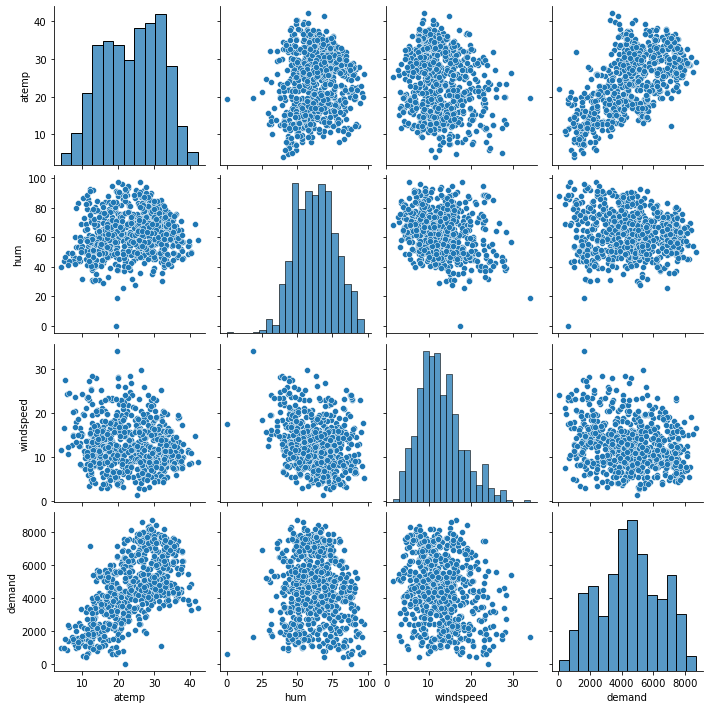

In [17]:
#let's visualize the numeric dataframe to see if atleast 1 variable has linear relationship
sns.pairplot(bike_df[num_var])

Considering that our <b>target variable is 'demand'</b>, numeric variable 'atemp' shows linear relationship with demand. Hence linear regression can be used as a model for prediction.
<br>
Let's proceed ahead with performing <b>univariate analysis</b> and visualize all the categorical variables against our target variable 'demand' and see if there is any trend that we can notice

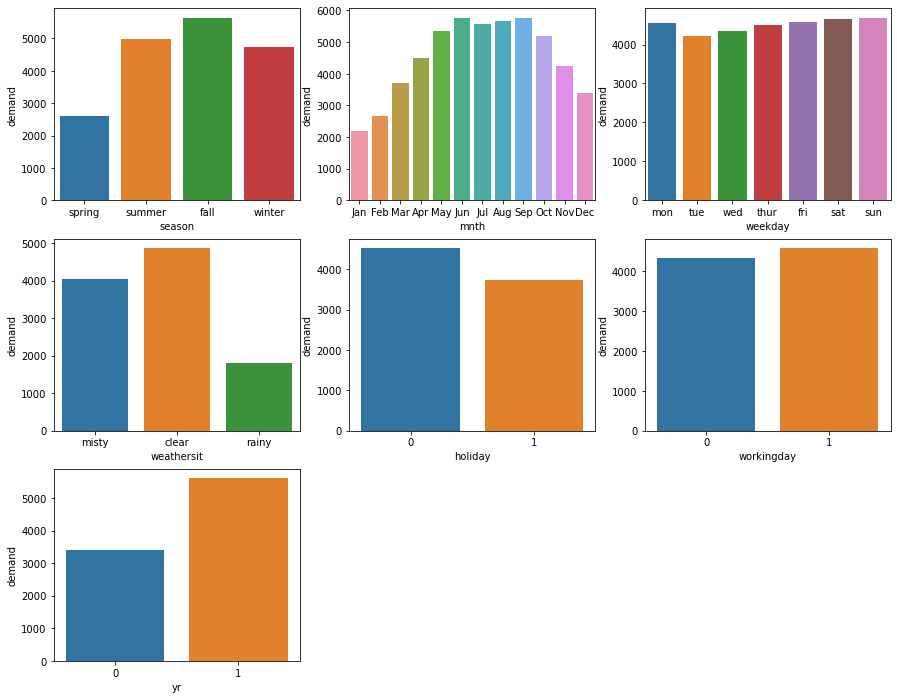

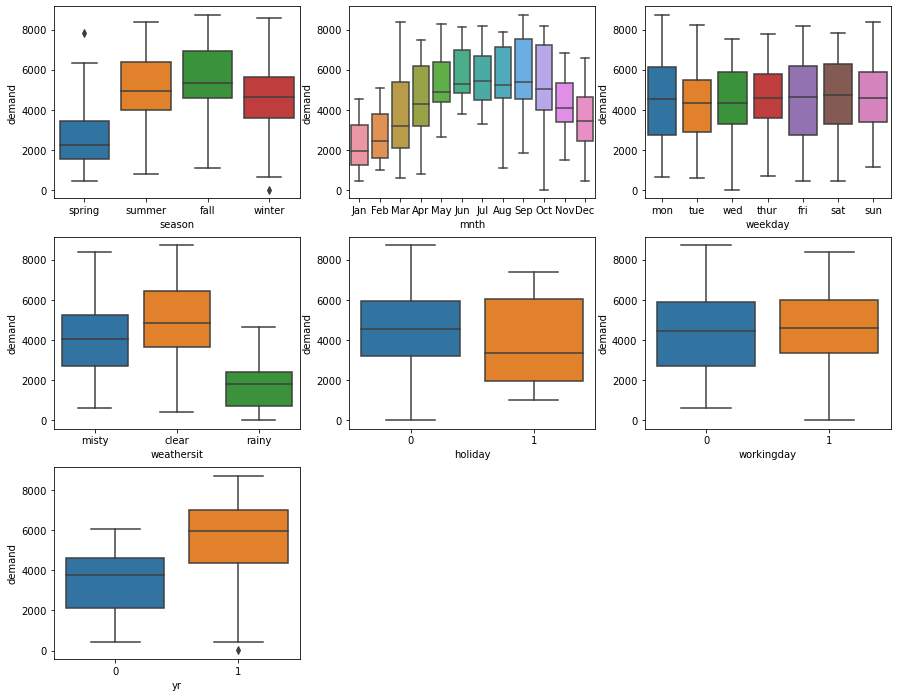

In [18]:
#let's visualize the categorical variables against the target variable 'cnt'
plt.figure(figsize=(15,12))

#Let's loop through the variables in cat_var list and plot it against cnt and visualise it in subplot
i=1
for var in cat_var:
    if(i<=len(cat_var)):
        plt.subplot(3,3,i)
        sns.barplot(data=bike_df,x=var,y='demand',ci=None)
    i=i+1

plt.figure(figsize=(15,12))
#Let's loop through the variables in cat_var list and plot it against cnt and visualise it in subplot
i=1
for var in cat_var:
    if(i<=len(cat_var)):
        plt.subplot(3,3,i)
        sns.boxplot(data=bike_df,x=var,y='demand')
    i=i+1    

<b>Inference:</b>
1. The demand is least in Spring season and peaks in Fall, Summer and Winter respectively
2. The demand is low in the months of Jan, Feb, Nov, Dec and there is substantial increase in demand from Mar to October
3. There is no significant pattern noticed for demand against weekdays apart from the fact that demand is least on Tuesdays
4. The demand is least when the weather situation is rainy whereas the demand is high in misty and clear sky weather situation
5. The demand is more on days when there is no public holiday. 
6. The demand is more or less the same whether it is a working day or not. No significant pattern noticed.
7. The demand has increased drastically 2019 when compared to 2018. There is a fair amount of chance that with popularity, the demand should increase subsequently

From the above inferance, on a high level we can say that the following categorical variables might play a fairly important part in predicting the demand:
1. Season
2. Month
3. Weather Situation
4. Public Holiday - Negative impact as the value decreases on public holidays
5. Year
<br>

Now that we have a fair understanding of the data and what variables we need to look out for, let's move towards preparing the data for modeling

## Checkpoint 2: Data Preparation

<b>Steps Involved:</b><br>

1. Dealing with Categorical Variables: Create Dummy predictors for the levels present in each categorical variable
2. Division of dataframe into train and test data
3. Normalization of Train Dataframe: Scaling the continuous numeric variables
4. Dividing the train dataframe into X_train (DF of all the predictor variables) and y_train (Target variable)

In [19]:
#Since there will be too many columns formed upon creating the dummy variables, let's set max_columns
pd.set_option('max_columns', None)

#let's take a look at the Dummy variables being created
pd.get_dummies(bike_df[cat_var].drop(['holiday','workingday','yr'],axis=1)).head()

,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_clear,weathersit_misty,weathersit_rainy
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [20]:
#Prepare the categorical variables for which dummy varaibles have to created
cat_var.remove('holiday')
cat_var.remove('workingday')
cat_var.remove('yr')

In [21]:
#store the df in a temp variable by removing the first
df_dummy = pd.get_dummies(bike_df[cat_var],drop_first=True)

#concatenate the same with original df by dropping the original categorical variables
bike_df1 = pd.concat([bike_df.drop(cat_var,axis=1),df_dummy],axis=1)

In [22]:
#check the resultant dataframe
print(bike_df1.shape)
bike_df1.head()

(730, 29)


,yr,holiday,workingday,atemp,hum,windspeed,demand,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_misty,weathersit_rainy
0,0,0,0,18.18,80.58,10.75,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,17.69,69.61,16.65,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,9.47,43.73,16.64,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.61,59.04,10.74,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46,43.70,12.52,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
#Let's check the dataframe to understand there are no columns with 'object' datatype before proceeding to modeling
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   atemp             730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   demand            730 non-null    int64  
 7   season_spring     730 non-null    uint8  
 8   season_summer     730 non-null    uint8  
 9   season_winter     730 non-null    uint8  
 10  mnth_Aug          730 non-null    uint8  
 11  mnth_Dec          730 non-null    uint8  
 12  mnth_Feb          730 non-null    uint8  
 13  mnth_Jan          730 non-null    uint8  
 14  mnth_Jul          730 non-null    uint8  
 15  mnth_Jun          730 non-null    uint8  
 16  mnth_Mar          730 non-null    uint8  
 1

Post creation of these dummy variables, let's move towards splitting the dataframe into train and test data

In [24]:
#import necessary library
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [25]:
#Split 75% of the original dataframe into train dataframe and the remaining 25% into test dataframe
df_train,df_test = train_test_split(bike_df1,train_size=0.75,random_state=100)
print(df_train.shape)
print(df_test.shape)

(547, 29)
(183, 29)


Now that we have separate train and test dataframes, let's move towards the next step of data preparation which is Normalization/MinMax scaling which is required to effectively interpret our coefficients and converge quickly to our minimum coeff values

In [26]:
#let's import the necessary library
from sklearn.preprocessing import MinMaxScaler

In [27]:
#Instantiate
scaler = MinMaxScaler()

#Fit and transform the dataset for all the continuous numerical variables
df_train[num_var] = scaler.fit_transform(df_train[num_var])

<AxesSubplot:>

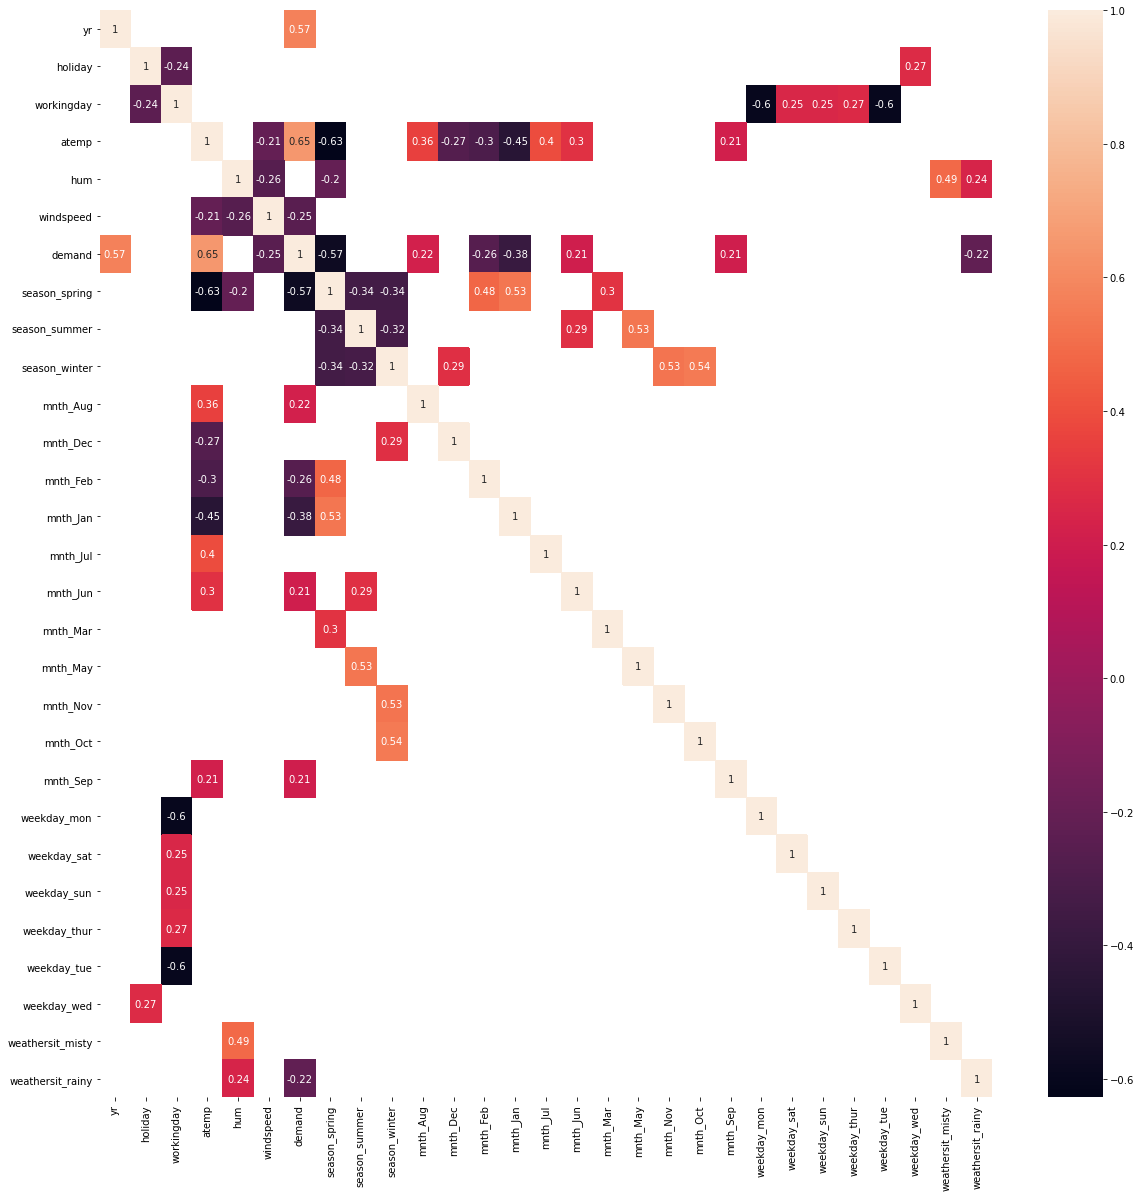

In [28]:
#let's look at the correlation of all the features with one another. Let's focus on only those corelations that are greater than 20%
#declare and initiate figure size of the map
plt.figure(figsize=(20,20))

#create the correlation of variables so that the same can be used to filter in required range
corr_var = df_train.corr()

#let's observe the heatmap
sns.heatmap(corr_var[(corr_var>=0.2)|(corr_var<=-0.2)],annot=True)

In [29]:
#Top 10 positively correlated variables/predictors with demand
corr_var['demand'].drop('demand').sort_values(ascending=False).head(12)

atemp            0.651473
yr               0.573177
mnth_Aug         0.218240
mnth_Sep         0.207293
mnth_Jun         0.206297
mnth_Jul         0.154424
season_summer    0.146895
workingday       0.109079
mnth_May         0.105387
mnth_Oct         0.092069
season_winter    0.065160
weekday_thur     0.035236
Name: demand, dtype: float64

In [30]:
#Top 10 negatively correlated variables/predictors with demand
corr_var['demand'].drop('demand').sort_values(ascending=False).tail(10).sort_values(ascending=True)

season_spring      -0.567066
mnth_Jan           -0.381270
mnth_Feb           -0.264816
windspeed          -0.247986
weathersit_rainy   -0.216487
weathersit_misty   -0.153314
mnth_Dec           -0.152277
mnth_Mar           -0.145005
holiday            -0.118934
weekday_tue        -0.078953
Name: demand, dtype: float64

Now that we have a train and test data and we have normalised the train dataframe, let's go ahead and move towards the last step of data preparation, the preparation of X_train and y_train.

In [31]:
y_train = df_train.pop('demand')
X_train = df_train

## Checkpoint 3: Modeling

There are 3 approaches to model building:
1. Manual Feature Elimination
2. Automated Feature Elimination
3. Balanced Approach for Feature Elimination

Let's build models using all 3 approaches and then we'll choose the best model later upon comparing the output of these models against test data

<b>Approach 1: Manual Feature Elimination</b>

<b>Steps Involved:</b><br>

1. Start with all 28 predictor variables and build model
2. Analyse the stats and drop features that are least helpful in prediction: High P value of Coeff
3. Drop features that are redundant: High VIF value
4. Repeat till best fit model is obtained for train data

In [32]:
#import necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

Let's start by defining a 3 functions that will be used redundantly throughout this notebook for building a LR model and evaluate the same. Following are the 3 functions:
1. Function that can be called to build an OLS model and print the summary statistics for the features filtered for buiding the model.
2. Function to calculate and print the VIF of predictor variables/features filtered
3. Function to predict the y for list of predictor variables shortlisted and stored in X_train and X_test dataframes

In [33]:
#Define a function to spit out sm stats table for input of different X_train and y_train combinations
def get_stats(X_data,y_data):
    #add constant for creating y-intercept
    X_data_lm = sm.add_constant(X_data)
    #create the OLS model
    lr_1 = sm.OLS(y_data, X_data_lm).fit()
    #print the summary
    print(lr_1.summary())
    return lr_1

#define a function to spit out the VIF stats for input of different X_Train combinations
def get_VIF(X_data):
    #instantiate an empty DF
    vif = pd.DataFrame()
    #insert 1st column as train dataframe column names
    vif['Features'] = X_data.columns
    #Append one more column with corresponding VIF values
    vif['VIF'] = [variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    #sort the values in the DF
    vif = vif.sort_values(by = "VIF", ascending = False)
    #Print the table
    print(vif)

#define a function to predict y when provided with a model object and x_train/x_test
def predict_y(lr_model,X_data):
    #add constant for creating y-intercept
    X_data_lm = sm.add_constant(X_data)
    #Predict y
    y_pred = lr_model.predict(X_data_lm)
    #return the y_pred object
    return y_pred

Now let's start the Manual Feature Elimination by building a model with all the 29 predictor variables and target variable:

In [34]:
#Call function to print OLS Summary and create OLS object
lr_model = get_stats(X_train,y_train)
#Call function to calculate VIF and print the same
get_VIF(X_train)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.39e-197
Time:                        21:51:55   Log-Likelihood:                 566.51
No. Observations:                 547   AIC:                            -1077.
Df Residuals:                     519   BIC:                            -956.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2467      0.034  

We observe that there are many features that are insignificant for our analysis as they have high P values. Let's make a list of these features which have p-value greater than 5% (0.050) and delete such features one by one. Let's print the summary and VIF post deleting each feature and evaluate the models stats again to decide if all these features need to be indeed deleted or not.

In [35]:
#choose the most insignificant feature
unwanted_feature = lr_model.pvalues[round(lr_model.pvalues,3)>0.05].sort_values(ascending=False).head(1).index
#declare an empty list so that we can print the list of features dropped in the loop
features = []
#Assign to a new variable so that the original train dataset is not touched
X_train_1 = X_train

#As long as there are insignificant features loop and drop these features
while(unwanted_feature.any()):
    #lets drop the unwanted feature
    features.append(unwanted_feature.any())
    print('\nDropped Features: ',features,'\n')
    #Drop the deature from the train dataframe and overwrite it back on the same dataframe
    X_train_1 = X_train_1.drop(unwanted_feature,1)
    
    #Let's take a look at the stats again
    #Call function to print OLS Summary and create OLS object
    lr_model = get_stats(X_train_1,y_train)

    #Call function to calculate VIF and print the same
    get_VIF(X_train_1)
    
    #choose the most insignificant feature post dropping
    unwanted_feature = lr_model.pvalues[round(lr_model.pvalues,3)>0.05].sort_values(ascending=False).head(1).index


print('\nThere were a total of ',len(features),' features dropped\n')


Dropped Features:  ['holiday'] 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.39e-197
Time:                        21:51:55   Log-Likelihood:                 566.51
No. Observations:                 547   AIC:                            -1077.
Df Residuals:                     519   BIC:                            -956.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const 

            Features    VIF
3                hum  38.50
2              atemp  33.75
1         workingday  19.90
7      season_winter  10.74
5      season_spring   9.59
6      season_summer   7.68
22       weekday_tue   5.90
18       weekday_mon   5.85
8           mnth_Aug   5.19
4          windspeed   5.04
16          mnth_Oct   4.82
12          mnth_Jul   4.57
15          mnth_Nov   4.33
17          mnth_Sep   3.72
9           mnth_Dec   3.15
11          mnth_Jan   2.60
13          mnth_Jun   2.50
24  weathersit_misty   2.39
0                 yr   2.12
10          mnth_Feb   2.12
14          mnth_May   2.08
23       weekday_wed   1.99
21      weekday_thur   1.88
19       weekday_sat   1.83
20       weekday_sun   1.79
25  weathersit_rainy   1.31

Dropped Features:  ['holiday', 'mnth_Mar', 'weekday_sat'] 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.854
Model:                   

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
            Features    VIF
3                hum  37.30
2              atemp  23.27
1         workingday  18.83
5      season_spring   6.56
18       weekday_tue   5.31
16       weekday_mon   5.26
4          windspeed   4.96
7      season_winter   4.58
6      season_summer   4.39
11          mnth_Jan   2.41
20  weathersit_misty   2.38
0                 yr   2.12
10          mnth_Feb   1.99
8           mnth_Aug   1.93
13          mnth_May   1.85
14          mnth_Nov   1.78
9           mnth_Dec   1.71
12          mnth_Jun   1.64
15          mnth_Sep   1.56
19       weekday_wed   1.43
17      weekday_thur   1.35
21  weathersit_rainy   1.30

Dropped Features:  ['holiday', 'mnth_Mar', 'weekday_sat', 'mnth_Oct', 'mnth_Jul', 'weekday_sun', 'weekday_thur'] 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                   

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
            Features    VIF
3                hum  35.56
2              atemp  20.10
1         workingday  18.08
5      season_spring   6.52
15       weekday_tue   4.85
4          windspeed   4.79
14       weekday_mon   4.79
7      season_winter   4.55
6      season_summer   3.51
11          mnth_Jan   2.36
16  weathersit_misty   2.36
0                 yr   2.09
10          mnth_Feb   1.98
8           mnth_Aug   1.83
12          mnth_Nov   1.78
9           mnth_Dec   1.70
13          mnth_Sep   1.52
17  weathersit_rainy   1.29

Dropped Features:  ['holiday', 'mnth_Mar', 'weekday_sat', 'mnth_Oct', 'mnth_Jul', 'weekday_sun', 'weekday_thur', 'weekday_wed', 'mnth_May', 'mnth_Jun', 'mnth_Feb'] 

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.850
Model:                            OLS   Adj. R-squa

Upon deleting the 11 predictor variables we are left with only 17 predictor variables which are pretty significant as the P-Value is less than 5% for these variables. Coming to VIF values, the VIF values of the features - hum, workingday, atemp are still high indicating that these are redundant variables and that most of the data contained by these columns are already being represented by other variables in the DF. These also need to be removed one after the other. 
The reason for the features one after the other is that removal of each feature will have impact on stats of the other.

In [36]:
#Lets drop the features one by one to see if it affects the VIF of the remaining features
X_train_2 = X_train_1.drop('hum',1)

#Call function to print OLS Summary and create OLS object
get_stats(X_train_2,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.11e-202
Time:                        21:51:55   Log-Likelihood:                 550.60
No. Observations:                 547   AIC:                            -1067.
Df Residuals:                     530   BIC:                            -994.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1410      0.039  

In [37]:
#Lets drop the features one by one to see if it affects the VIF of the remaining features
X_train_3 = X_train_2.drop('workingday',1)

#Call function to print OLS Summary and create OLS object
get_stats(X_train_3,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.08e-199
Time:                        21:51:55   Log-Likelihood:                 540.74
No. Observations:                 547   AIC:                            -1049.
Df Residuals:                     531   BIC:                            -980.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2470      0.032  

We observe tht upon dropping the workingday column, the p value of weekday_mon shot up to 0.256 which is much greater than the permissible limit - 0.05. Hence let's go ahead and drop that too

In [38]:
#We observe tht upon dropping the workingday column, the p value of weekday_mon shot up to 0.256
#which is much greater than the permissible limit - 0.05. Hence let's go ahead and drop that too
X_train_4 = X_train_3.drop('weekday_mon',1)

#Call function to print OLS Summary and create OLS object
get_stats(X_train_4,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.49e-200
Time:                        21:51:55   Log-Likelihood:                 540.03
No. Observations:                 547   AIC:                            -1050.
Df Residuals:                     532   BIC:                            -985.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2498      0.032  

Now because atemp has VIF grater than our threshold, let's go ahead and drop and see its effect on the stats

In [39]:
#lets drop the feature with high VIF value
X_train_5 = X_train_4.drop('atemp',1)

#Call function to print OLS Summary and create OLS object
get_stats(X_train_5,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          9.39e-175
Time:                        21:51:55   Log-Likelihood:                 476.00
No. Observations:                 547   AIC:                            -924.0
Df Residuals:                     533   BIC:                            -863.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5842      0.016  

From the above stats it is pretty clear that dropping atemp is a bad decision. Hence let's reduce the threshold of the p-value to 0.005 and drop cloumns that have p-value greater than 0.5%. The reason for doing this is to prevent the model to be too complex with too many variables.
mnth_Aug has a p-value of 0.018 which is greater than our new threshold only for this scenario. Let's go ahead and drop the same.

In [40]:
#Drop feature with p-value greater than 0.005
X_train_5 = X_train_4.drop('mnth_Aug',1)

#Call function to print OLS Summary and create OLS object
get_stats(X_train_5,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.62e-200
Time:                        21:51:55   Log-Likelihood:                 537.16
No. Observations:                 547   AIC:                            -1046.
Df Residuals:                     533   BIC:                            -986.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2723      0.030  

In [41]:
#Drop feature with p-value greater than 0.005
X_train_6 = X_train_5.drop('season_summer',1)

#Call function to print OLS Summary and create OLS object
lr_model = get_stats(X_train_6,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     226.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.63e-200
Time:                        21:51:56   Log-Likelihood:                 533.85
No. Observations:                 547   AIC:                            -1042.
Df Residuals:                     534   BIC:                            -985.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3174      0.025  

We are left with 12 predictor variables but in order to avoid making the interpretation too complex, let filter down the variables to 10 variables. Let's find the variable with higherst P vaue out of the 12 variables to identify the most insignificant vaiable out the remaining 12 and then drop it and run the OLS

In [42]:
lr_model.pvalues[lr_model.pvalues>0].sort_values(ascending=False).head(1)

mnth_Jan    0.000372
dtype: float64

In [43]:
#Drop most insignificant feature
X_train_7 = X_train_6.drop('mnth_Jan',1)

#Call function to print OLS Summary and create OLS object
lr_model = get_stats(X_train_7,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     240.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          9.19e-199
Time:                        21:51:56   Log-Likelihood:                 527.35
No. Observations:                 547   AIC:                            -1031.
Df Residuals:                     535   BIC:                            -979.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2930      0.024  

Let's repeat the process 1 last time to finally narrow down to 10 predictor variables

In [44]:
lr_model.pvalues[lr_model.pvalues>0].sort_values(ascending=False).head(1)

mnth_Dec    0.000693
dtype: float64

In [45]:
#Drop most insignificant feature
X_train_man = X_train_7.drop('mnth_Dec',1)

#Call function to print OLS Summary and create OLS object
lr_model_man = get_stats(X_train_man,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_man)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     257.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.73e-197
Time:                        21:51:56   Log-Likelihood:                 521.46
No. Observations:                 547   AIC:                            -1021.
Df Residuals:                     536   BIC:                            -973.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2752      0.024  

<b>Inference:</b><br>
lr_model_man is the optimum linear regression model obtained as part of Manual Feature Elimination approach with X_train_man consiting of 10 independent predictor variables and y_train consisting of 1 target variable
* <b> R2 of lr_model_man train model => 0.828</b>
* <b> Adj. R2 of lr_model_man train model => 0.825</b>

<b>Approach 2: Automated</b><br>
As observed above, the manual approach is time consuming and it required us to manually iterate through the filtering process to narrow down to our 10 variables. There are different ways to automate this process. Let's look at one such approach called RFE

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Let's build an automated model on all the 28 predictor variables using sklearn library's linear_model package. Then let's run the RFE on this model and observe the 12 columns selected by the RFE algorithm

In [47]:
#Build a linear regression model on X_train and Y_train data
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 10
rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)

In [48]:
#look at the ranking provided to predictor variables by RFE algorithm
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 6),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 9),
 ('mnth_Jul', False, 13),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 12),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 17),
 ('mnth_Sep', False, 2),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 18),
 ('weekday_sun', False, 16),
 ('weekday_thur', False, 15),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 14),
 ('weathersit_misty', False, 5),
 ('weathersit_rainy', True, 1)]

In [49]:
#let's look at the 12 columns filtered by RFE algorithm
sel_col = X_train.columns[rfe.support_]
sel_col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_winter', 'weekday_mon', 'weekday_tue', 'weathersit_rainy'],
      dtype='object')

In [50]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[sel_col]

In [51]:
#Let's look at the Stats to check the R-square and adj. R-square values
lr_model_auto = get_stats(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     240.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.23e-182
Time:                        21:51:56   Log-Likelihood:                 482.35
No. Observations:                 547   AIC:                            -944.7
Df Residuals:                     537   BIC:                            -901.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1702      0.022  

<b>Inference</b><br>
lr_model_auto is the linear regression model obtained as part of auto feature selection approach with X_train_rfe consiting of 10 independent predictor variables and y_train consisting of 1 target variable. But as noticed above, the model is not very optimum as there is multicollinearity and insignificant predictor variables like holiday which have high VIF and P values. Hence the next approach should be the best approach for building linear regression model.
* <b> R2 of lr_model_man train model => 0.801</b>
* <b> Adj. R2 of lr_model_man train model => 0.798</b>

<b>Approach 3: Balanced</b><br>

<b>Steps Involved:</b><br>

1. Filtering Feature using Automated process : RFE(REcursive Feature Eliminator) 
2. Build/Fit a model for the train data by Backward selection
3. Analyse the stats and drop features that are least helpful in prediction: High P value of Coeff
4. Drop features that are redundant: High VIF value
5. Repeat till best fit model is obtained for train data

In [52]:
#Build a linear regression model on X_train and Y_train data
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [53]:
#observe the RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', False, 8),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 13),
 ('weekday_sun', False, 11),
 ('weekday_thur', False, 10),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 9),
 ('weathersit_misty', True, 1),
 ('weathersit_rainy', True, 1)]

In [54]:
#let's look at the columns selected by RFE
sel_col = X_train.columns[rfe.support_]
sel_col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Sep', 'weekday_mon', 'weekday_tue', 'weathersit_misty',
       'weathersit_rainy'],
      dtype='object')

In [55]:
# Creating X_train_auto dataframe with RFE selected variables
X_train_auto = X_train[sel_col]

Now that we have narrowed down the predictor variables from 28 to 15 using the RFE algorithm, let's now manually filter and remove the insignificant predictor variables (variables with p-value>0.050) and the redundant predictor variables (variables with VIF > 5). Let's start by looking at the OLS stats for the model with 15 variables filtered.

In [56]:
#Call function to print OLS Summary and create OLS object/model
lr_model_bal = get_stats(X_train_auto,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_auto)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.45e-205
Time:                        21:51:56   Log-Likelihood:                 551.05
No. Observations:                 547   AIC:                            -1072.
Df Residuals:                     532   BIC:                            -1008.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1867      0.027  

We can see that variable 'holiday' has p-value greater than our threshold. Let's go ahead and drop this variable to see the OLS stats again

In [57]:
#drop the insignificant feature
X_train_fil = X_train_auto.drop('holiday',1)

#Call function to print OLS Summary and create OLS object/model
lr_model_bal = get_stats(X_train_fil,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_fil)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.45e-205
Time:                        21:51:56   Log-Likelihood:                 551.05
No. Observations:                 547   AIC:                            -1072.
Df Residuals:                     532   BIC:                            -1008.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1568      0.041  

Let's go ahead and drop the variable with high VIF i.e., largest VIF value that is greater than our threshold - 5

In [58]:
#drop the redundant feature
X_train_fil1 = X_train_fil.drop('hum',1)

#Call function to print OLS Summary and create OLS object/model
lr_model_bal = get_stats(X_train_fil1,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_fil1)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     214.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.94e-202
Time:                        21:51:56   Log-Likelihood:                 540.99
No. Observations:                 547   AIC:                            -1054.
Df Residuals:                     533   BIC:                            -993.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0760      0.037  

Observe that variable 'workingday' has largest VIF. Let's go ahead and drop the same.

In [59]:
#drop the redundant feature
X_train_fil2 = X_train_fil1.drop('workingday',1)

#Call function to print OLS Summary and create OLS object/model
lr_model_bal = get_stats(X_train_fil2,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_fil2)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     221.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.59e-198
Time:                        21:51:56   Log-Likelihood:                 529.63
No. Observations:                 547   AIC:                            -1033.
Df Residuals:                     534   BIC:                            -977.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1856      0.029  

Upon dropping the predictor variable 'weekday', the p-value of variable 'weekday_mon' has creeped up to 22% indicating it is no longer significant. Hence let's go ahead and drop the same

In [60]:
#drop the insignificant feature
X_train_fil3 = X_train_fil2.drop('weekday_mon',1)

#Call function to print OLS Summary and create OLS object/model
lr_model_bal = get_stats(X_train_fil3,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_fil3)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.11e-199
Time:                        21:51:56   Log-Likelihood:                 528.86
No. Observations:                 547   AIC:                            -1034.
Df Residuals:                     535   BIC:                            -982.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1883      0.029  

Now we are left with 11 predictor variables. Since we are building a model with 10 predictor variables, lets go ahead and drop 1 more variable. Currently there are no insignificant variables as per our current threshold i.e., 5%. But there is a variable which has VIF greater than 5. Let's go ahead and drop the same

In [61]:
#drop the redundant feature
X_train_fil4 = X_train_fil3.drop('atemp',1)

#Call function to print OLS Summary and create OLS object/model
lr_model_bal = get_stats(X_train_fil4,y_train)

#Call function to calculate VIF and print the same
get_VIF(X_train_fil4)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.53e-160
Time:                        21:51:56   Log-Likelihood:                 433.80
No. Observations:                 547   AIC:                            -845.6
Df Residuals:                     536   BIC:                            -798.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5684      0.017  

Clearly dropping atemp was a bad decision. Let's lower the threshold of p-value to 0.005 and judge the if value of data present against each variable is higher or lower than this p-value threshold. Let's drop mnth_Aug with p-value greater than 0.005 instead of atemp.

In [62]:
X_train_bal = X_train_fil3.drop('mnth_Aug',1)
lr_model_bal = get_stats(X_train_bal,y_train)
get_VIF(X_train_bal)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     262.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.39e-199
Time:                        21:51:56   Log-Likelihood:                 525.23
No. Observations:                 547   AIC:                            -1028.
Df Residuals:                     536   BIC:                            -981.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2117      0.028  

This looks like an optimum model with 10 predictor variable and 1 target variable

<b>Inference</b><br>
lr_model_bal is the linear regression model obtained as part of auto feature selection approach with X_train_bal consiting of 10 independent predictor variables and y_train consisting of 1 target variable.
* <b> R2 of lr_model_man train model => 0.830</b>
* <b> Adj. R2 of lr_model_man train model => 0.827</b>

## Checkpoint 4: Residual Analysis

1. Residuals/Error terms are normally distributed
2. Residuals/Error terms independent of each other
3. Error terms have constant variance

In [63]:
#Let's first calculate the predicted y for all three models
y_pred_man = predict_y(lr_model_man,X_train_man)
y_pred_auto = predict_y(lr_model_auto,X_train_rfe)
y_pred_bal = predict_y(lr_model_bal,X_train_bal)

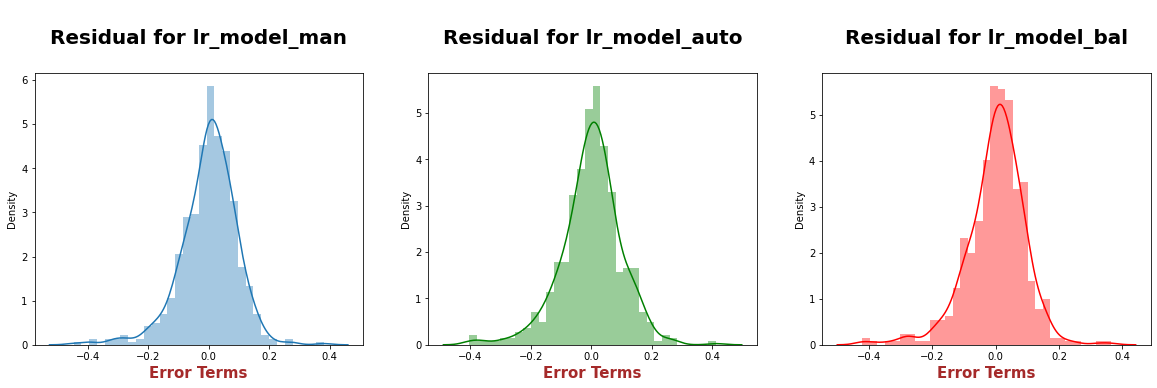

In [64]:
#calculate the residuals for predicted y and original y_train datapoints
res_man = (y_train-y_pred_man)
res_auto = (y_train-y_pred_auto)
res_bal = (y_train-y_pred_bal)

#Figure size
plt.figure(figsize=(20,5))

#Let's plot all the residuals calculated
plt.subplot(1,3,1)
sns.distplot(res_man)
plt.title("\nResidual for lr_model_man\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(1,3,2)
sns.distplot(res_auto,color ='g')
plt.title("\nResidual for lr_model_auto\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(1,3,3)
sns.distplot(res_bal,color ='r')
plt.title("\nResidual for lr_model_bal\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("Error Terms", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.show()

<b>Inference: </b>Residuals for all three models are normally distributed

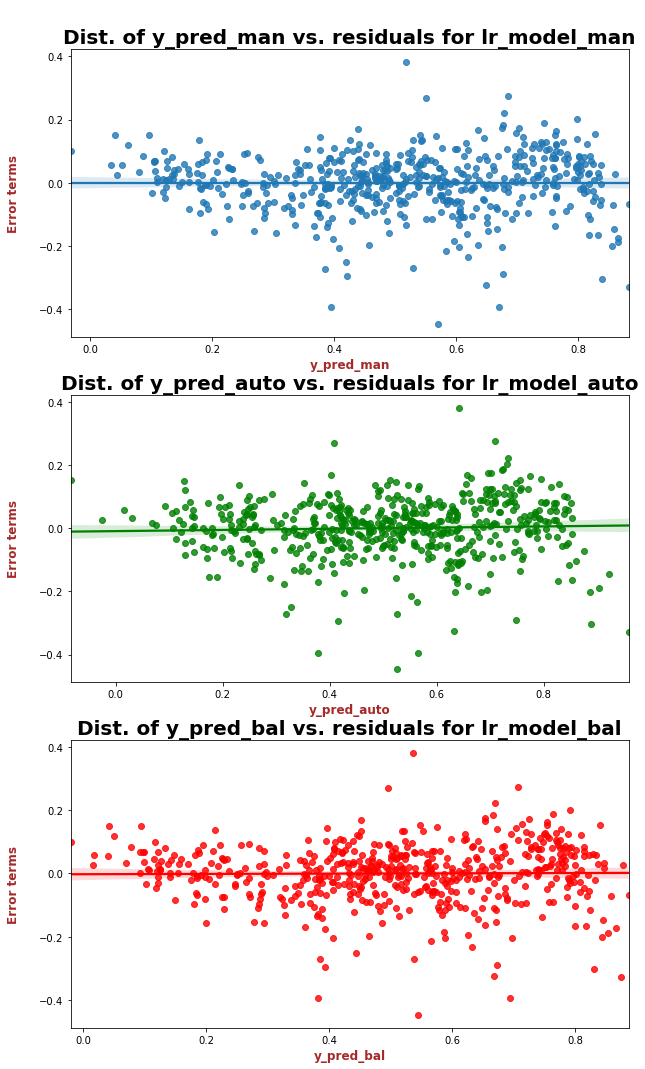

In [65]:
#Figure size
plt.figure(figsize=(10,18))

#let's plot a scatter plot of residuals against predicted y_train
plt.subplot(3,1,1)
sns.regplot(y_pred_man,res_man)
plt.title("\nDist. of y_pred_man vs. residuals for lr_model_man", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_pred_man", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,1,2)
sns.regplot(y_pred_auto,res_man,color = 'g')
plt.title("\nDist. of y_pred_auto vs. residuals for lr_model_auto", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_pred_auto", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,1,3)
sns.regplot(y_pred_bal,res_man,color = 'r')
plt.title("\nDist. of y_pred_bal vs. residuals for lr_model_bal", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_pred_bal", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("Error terms\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.show()

<b>Inference: </b>
1. From all three scatter plots it is evident that the error points are independent of each other as there is no notable pattern observed
2. From all the three scatter plots it is evident that the error points are distributed around 0 with max constant variance 0.4 on both sides

<b>From the above inferences we can conclude that linear regression is a good model for our prediction</b>

## Checkpoint 5: Model Evaluation

1. Apply scaling for only numerical data test data
2. Prepare X_test and y_test from df_test
3. Prepare X_test_man with same columns as X_train_man
4. Prepare X_test_rfe with same columns as X_train_rfe
5. Prepare X_test_bal with same columns as X_train_bal
6. Model Prediction: Visualize y_pred against y_test to make sure that both are linearly associated
7. Model Comparison: Compare Models to find the best fit model by finding the R2 and adjusted R2 for the test models created

Let's apply scaling to numerical values in test data before dividing the data in X_test and y_test. Note that you will only be transforming the data on test dataframe on a scaler that has been fit for train dataframe

In [66]:
#Fit the scaler on train dataframe but transform the dataset for all the continuous numerical variables in test datafram
df_test[num_var] = scaler.transform(df_test[num_var])

In [67]:
#Let's look at the stats of new scaled numerical variables in test DF
df_test[num_var].describe()

,atemp,hum,windspeed,demand
count,183.000000,183.000000,183.000000,183.000000
mean,0.542190,0.635177,0.316540,0.530233
std,0.219335,0.152928,0.159334,0.215783
min,0.025991,0.261954,-0.042669,0.048205
25%,0.354949,0.522620,0.199230,0.393293
50%,0.558414,0.618714,0.303497,0.533134
75%,0.729194,0.735109,0.404556,0.681086
max,0.981097,1.002164,0.807507,0.963300


Notice that because we have transformed the test dataframe on a scaler that was fit on train dataframe the max value is not exactly 1 but more or less than 1 based on the data held by test dataframe

Now let's move towards preparing the X_test and y_test dataframes from the scaled df_test dataframe

In [68]:
#Let's prepare X_test and y_test variables from the scaled test dataframe
y_test = df_test.pop('demand')
X_test = df_test

Once we have our X_test, let's prepare 3 different X_test dataframes for our 3 models consisting of same columns as X_train_man, X_train_rfe, X_train_bal.

In [69]:
#let's filter the columns in X_test_man,X_test_auto,X_test_bal to have the same features as X_train_4,X_train_rfe,X_train_fil4
X_test_man = X_test[X_train_man.columns.tolist()]
X_test_rfe = X_test[X_train_rfe.columns.tolist()]
X_test_bal = X_test[X_train_bal.columns.tolist()]

<b>Model Prediction: </b>

In [70]:
#Let's first calculate the predicted y for all three models
y_test_pred_man = predict_y(lr_model_man,X_test_man)
y_test_pred_auto = predict_y(lr_model_auto,X_test_rfe)
y_test_pred_bal = predict_y(lr_model_bal,X_test_bal)

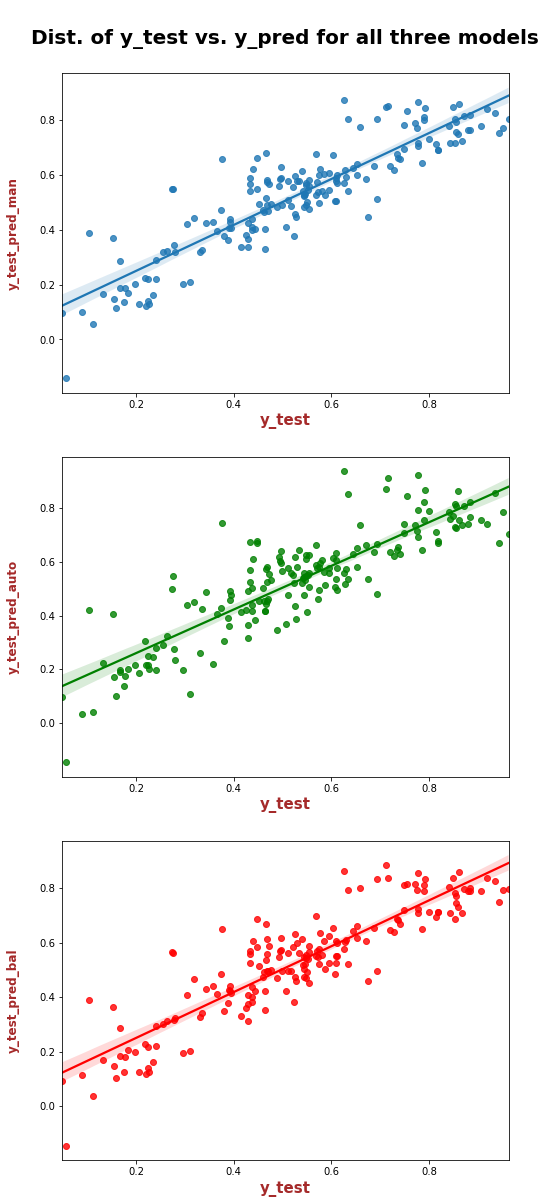

In [71]:
#Figure size
plt.figure(figsize=(8,20))

#let's plot a scatter plot of residuals against predicted y_train
plt.subplot(3,1,1)
sns.regplot(y_test,y_test_pred_man)
plt.title("\nDist. of y_test vs. y_pred for all three models\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})
plt.xlabel("y_test", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("y_test_pred_man\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,1,2)
sns.regplot(y_test,y_test_pred_auto,color = 'g')
plt.xlabel("y_test", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("y_test_pred_auto\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.subplot(3,1,3)
sns.regplot(y_test,y_test_pred_bal,color = 'r')
plt.xlabel("y_test", fontdict={'fontsize': 15, 'fontweight' : 'bold', 'color' : 'Brown'})
plt.ylabel("y_test_pred_bal\n", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Brown'})

plt.show()

<b>Model Comparison</b>

From the graphs plotted above all three models seem to perform well in predicting the variance in Y for different values of X. But the most effective model among the three can be obtained by finding out the R-square and Adj. R-square values and measuring the difference of this R-Square with the R-square obtained by model built using train data.

In [72]:
#import necessary libraries
from sklearn.metrics import r2_score

Let's find out the R-square value for all 3 models using train data:

In [73]:
#r2 score for y_pred_man predicted using the model obtained by Manual filtering
r2_train_man = r2_score(y_train, y_pred_man)
round(r2_train_man,3)

0.828

In [74]:
#r2 score for y_pred_auto predicted using the model obtained by RFE filtering
r2_train_auto = r2_score(y_train, y_pred_auto)
round(r2_train_auto,3)

0.801

In [75]:
#r2 score for y_pred_bal predicted using the model obtained by balanced approach of filtering
r2_train_bal = r2_score(y_train, y_pred_bal)
round(r2_train_bal,3)

0.83

Let's find out the R-square value for all 3 models using test data:

In [76]:
#r2 score for y_test_pred_man predicted using the model obtained by Manual filtering
r2_test_man = r2_score(y_test, y_test_pred_man)
round(r2_test_man,3)

0.805

In [77]:
#r2 score for y_test_pred_auto predicted using the model obtained by Automatic RFE filtering
r2_test_auto = r2_score(y_test, y_test_pred_auto)
round(r2_test_auto,3)

0.754

In [78]:
#r2 score for y_testr2_test_auto = _pred_bal predicted using the model obtained by balanced approach of filtering
r2_test_bal = r2_score(y_test, y_test_pred_bal)
round(r2_test_bal,3)

0.798

Let's find the difference between the R2 of train and test datadet and declare a winner

In [79]:
#Find difference of trains and test r2 scores for all three models
diff_man = round((r2_train_man - r2_test_man),3)
diff_auto = round((r2_train_auto - r2_test_auto),3)
diff_bal = round((r2_train_bal - r2_test_bal),3)

#Print the difference
print(diff_man,diff_auto,diff_bal)

0.023 0.047 0.032


Hence diff_man < diff_bal < diff_auto

<b>Inference:</b>


Clearly lr_model_man model is perfomring better than lr_model_bal which is performing better than lr_model_auto. lr_model_man obtained by Manual Feature Elimination is the best model that fits the test data. 

## Conclusion:

Following are the features that affect the demand as per the performance of best model on test data:

In [80]:
#sort the features on its effectiveness/contributing capacity towards demand in descending order. Store it in list
final_features = lr_model_man.params.abs().sort_values(ascending = False).index.tolist()

#remove constant to maintain list of only predictor variables
final_features.remove('const')

#print it out
final_features

['atemp',
 'weathersit_rainy',
 'yr',
 'season_spring',
 'windspeed',
 'weathersit_misty',
 'mnth_Sep',
 'season_winter',
 'weekday_tue',
 'mnth_Nov']

As per the linear regression model - lr_model_man, the equation of the best fit line on test data can be defined by the following equation:

$ demand = 0.43  \times  atemp - 0.29  \times  weathersit\_rainy + 0.23 \times yr - 0.13 \times season\_spring - 0.12 \times windspeed - 0.078 \times weathersit\_misty + 0.060 \times mnth\_Sep + 0.055 \times season\_winter - 0.046 \times weekday\_tue - 0.042 \times mnth\_Nov + 0.275 $